In [0]:
#!pip install Gudiya==0.1.1.4
#!pip install pytorch-gradcam

In [0]:
import torchvision
import torch
import torch.optim as optim
import torch.nn as nn
import torchvision.transforms as transforms

In [0]:
import Model as Md
from TrainTestandUtils import TrainTestandUtils as Tt

In [0]:
#!pip install -U git+https://github.com/albu/albumentations --no-cache-dir

In [0]:

from Albumentations import album_compose
from GradCAM import GradCAM
from Utils import *

In [0]:
a =album_compose()

In [0]:
from lr_finder import LRFinder

In [34]:
transform = transforms.Compose(
    [ transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=a)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=128,
                                          shuffle=True, num_workers=4)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=128,
                                         shuffle=False, num_workers=4)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


In [35]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print (device)

cuda


Stopping early, the loss has diverged
Learning rate search finished. See the graph with {finder_name}.plot()



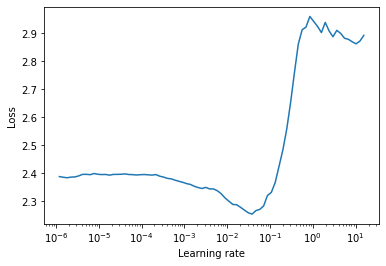

In [36]:

model = Md.ResNet18().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=1e-7, momentum=0.9,weight_decay=0.0004)
lr_finder = LRFinder(model, optimizer, criterion, device="cuda")
lr_finder.range_test(trainloader, end_lr=100, num_iter=100)
lr_finder.plot()

In [0]:
from torch.optim.lr_scheduler import ReduceLROnPlateau

In [0]:
# Found optimum LR to be 0.07

model = Md.ResNet18().to(device)
optimizer = optim.SGD(model.parameters(), lr=0.07, momentum=0.95)
scheduler = ReduceLROnPlateau(optimizer, 'min')

new_model = Tt(model=model,
               device=device,
               optimizer=optimizer,
               criterion=criterion,
               scheduler=scheduler,
               trainloader=trainloader,
               testloader=testloader,
               epochs=50,
               input_size=(3,32,32),
               classes=classes)

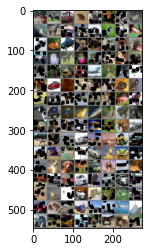

In [39]:
new_model.plot_train_images()

In [40]:
new_model.disp_summary()

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
       BatchNorm2d-2           [-1, 64, 32, 32]             128
            Conv2d-3           [-1, 64, 32, 32]          36,864
       BatchNorm2d-4           [-1, 64, 32, 32]             128
            Conv2d-5           [-1, 64, 32, 32]          36,864
       BatchNorm2d-6           [-1, 64, 32, 32]             128
        BasicBlock-7           [-1, 64, 32, 32]               0
            Conv2d-8           [-1, 64, 32, 32]          36,864
       BatchNorm2d-9           [-1, 64, 32, 32]             128
           Conv2d-10           [-1, 64, 32, 32]          36,864
      BatchNorm2d-11           [-1, 64, 32, 32]             128
       BasicBlock-12           [-1, 64, 32, 32]               0
           Conv2d-13          [-1, 128, 16, 16]          73,728
      BatchNorm2d-14          [-1, 128,

In [41]:
new_model.runModel()

  0%|          | 0/391 [00:00<?, ?it/s]

EPOCH  1


Loss=1.620570182800293 Batch_id=390 Accuracy=27.91: 100%|██████████| 391/391 [00:32<00:00, 12.00it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0126, Accuracy: 4035/10000 (40.35%)

EPOCH  2


Loss=1.348994493484497 Batch_id=390 Accuracy=43.29: 100%|██████████| 391/391 [00:32<00:00, 12.03it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0114, Accuracy: 4819/10000 (48.19%)

EPOCH  3


Loss=1.0986738204956055 Batch_id=390 Accuracy=51.81: 100%|██████████| 391/391 [00:32<00:00, 12.02it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0092, Accuracy: 5780/10000 (57.80%)

EPOCH  4


Loss=1.1010091304779053 Batch_id=390 Accuracy=58.50: 100%|██████████| 391/391 [00:32<00:00, 12.00it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0078, Accuracy: 6451/10000 (64.51%)

EPOCH  5


Loss=1.0179402828216553 Batch_id=390 Accuracy=62.78: 100%|██████████| 391/391 [00:32<00:00, 12.00it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0072, Accuracy: 6801/10000 (68.01%)

EPOCH  6


Loss=0.9749174118041992 Batch_id=390 Accuracy=66.92: 100%|██████████| 391/391 [00:32<00:00, 12.04it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0065, Accuracy: 7093/10000 (70.93%)

EPOCH  7


Loss=0.5308297276496887 Batch_id=390 Accuracy=69.49: 100%|██████████| 391/391 [00:32<00:00, 11.98it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0061, Accuracy: 7286/10000 (72.86%)

EPOCH  8


Loss=0.7242727875709534 Batch_id=390 Accuracy=71.81: 100%|██████████| 391/391 [00:32<00:00, 12.00it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0058, Accuracy: 7441/10000 (74.41%)

EPOCH  9


Loss=0.624951958656311 Batch_id=390 Accuracy=74.54: 100%|██████████| 391/391 [00:32<00:00, 12.01it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0052, Accuracy: 7714/10000 (77.14%)

EPOCH  10


Loss=0.9604325294494629 Batch_id=390 Accuracy=76.65: 100%|██████████| 391/391 [00:32<00:00, 11.97it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0051, Accuracy: 7792/10000 (77.92%)

EPOCH  11


Loss=0.8046202659606934 Batch_id=390 Accuracy=78.20: 100%|██████████| 391/391 [00:32<00:00, 12.01it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0049, Accuracy: 7884/10000 (78.84%)

EPOCH  12


Loss=0.4225618243217468 Batch_id=390 Accuracy=80.18: 100%|██████████| 391/391 [00:32<00:00, 12.05it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0042, Accuracy: 8133/10000 (81.33%)

EPOCH  13


Loss=0.6418900489807129 Batch_id=390 Accuracy=81.28: 100%|██████████| 391/391 [00:32<00:00, 12.01it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0043, Accuracy: 8162/10000 (81.62%)

EPOCH  14


Loss=0.5801170468330383 Batch_id=390 Accuracy=82.69: 100%|██████████| 391/391 [00:32<00:00, 12.01it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0042, Accuracy: 8191/10000 (81.91%)

EPOCH  15


Loss=0.479726642370224 Batch_id=390 Accuracy=83.92: 100%|██████████| 391/391 [00:32<00:00, 11.99it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0041, Accuracy: 8270/10000 (82.70%)

EPOCH  16


Loss=0.3923467993736267 Batch_id=390 Accuracy=85.18: 100%|██████████| 391/391 [00:32<00:00, 12.00it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0042, Accuracy: 8251/10000 (82.51%)

EPOCH  17


Loss=0.4229116439819336 Batch_id=390 Accuracy=85.90: 100%|██████████| 391/391 [00:32<00:00, 12.02it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0050, Accuracy: 8063/10000 (80.63%)

EPOCH  18


Loss=0.570676326751709 Batch_id=390 Accuracy=86.97: 100%|██████████| 391/391 [00:32<00:00, 12.03it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0047, Accuracy: 8271/10000 (82.71%)

EPOCH  19


Loss=0.4156282842159271 Batch_id=390 Accuracy=87.71: 100%|██████████| 391/391 [00:32<00:00, 12.03it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0040, Accuracy: 8434/10000 (84.34%)

EPOCH  20


Loss=0.3821478486061096 Batch_id=390 Accuracy=88.57: 100%|██████████| 391/391 [00:32<00:00, 12.01it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0039, Accuracy: 8484/10000 (84.84%)

EPOCH  21


Loss=0.36535507440567017 Batch_id=390 Accuracy=89.53: 100%|██████████| 391/391 [00:32<00:00, 11.99it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0040, Accuracy: 8510/10000 (85.10%)

EPOCH  22


Loss=0.2921830713748932 Batch_id=390 Accuracy=90.06: 100%|██████████| 391/391 [00:32<00:00, 11.93it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0040, Accuracy: 8504/10000 (85.04%)

EPOCH  23


Loss=0.27311766147613525 Batch_id=390 Accuracy=90.60: 100%|██████████| 391/391 [00:32<00:00, 12.06it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0040, Accuracy: 8523/10000 (85.23%)

EPOCH  24


Loss=0.21503672003746033 Batch_id=390 Accuracy=91.31: 100%|██████████| 391/391 [00:32<00:00, 11.99it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0043, Accuracy: 8510/10000 (85.10%)

EPOCH  25


Loss=0.11947455257177353 Batch_id=390 Accuracy=91.37: 100%|██████████| 391/391 [00:32<00:00, 11.99it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0038, Accuracy: 8600/10000 (86.00%)

EPOCH  26


Loss=0.3392059803009033 Batch_id=390 Accuracy=92.24: 100%|██████████| 391/391 [00:32<00:00, 12.06it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0043, Accuracy: 8624/10000 (86.24%)

EPOCH  27


Loss=0.2734202444553375 Batch_id=390 Accuracy=92.60: 100%|██████████| 391/391 [00:32<00:00, 12.00it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0042, Accuracy: 8590/10000 (85.90%)

EPOCH  28


Loss=0.252963125705719 Batch_id=390 Accuracy=92.85: 100%|██████████| 391/391 [00:32<00:00, 11.96it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0044, Accuracy: 8573/10000 (85.73%)

EPOCH  29


Loss=0.08059506118297577 Batch_id=390 Accuracy=93.26: 100%|██████████| 391/391 [00:32<00:00, 11.91it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0042, Accuracy: 8600/10000 (86.00%)

EPOCH  30


Loss=0.16613677144050598 Batch_id=390 Accuracy=93.65: 100%|██████████| 391/391 [00:32<00:00, 11.95it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0041, Accuracy: 8634/10000 (86.34%)

EPOCH  31


Loss=0.11540460586547852 Batch_id=390 Accuracy=93.94: 100%|██████████| 391/391 [00:32<00:00, 11.93it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0042, Accuracy: 8606/10000 (86.06%)

EPOCH  32


Loss=0.17709527909755707 Batch_id=390 Accuracy=94.12: 100%|██████████| 391/391 [00:32<00:00, 11.98it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0042, Accuracy: 8628/10000 (86.28%)

EPOCH  33


Loss=0.37044650316238403 Batch_id=390 Accuracy=94.64: 100%|██████████| 391/391 [00:32<00:00, 11.97it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0042, Accuracy: 8651/10000 (86.51%)

EPOCH  34


Loss=0.3112443685531616 Batch_id=390 Accuracy=94.59: 100%|██████████| 391/391 [00:32<00:00, 12.00it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0041, Accuracy: 8666/10000 (86.66%)

EPOCH  35


Loss=0.31472569704055786 Batch_id=390 Accuracy=94.70: 100%|██████████| 391/391 [00:32<00:00, 11.93it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0041, Accuracy: 8661/10000 (86.61%)

EPOCH  36


Loss=0.18014666438102722 Batch_id=390 Accuracy=95.24: 100%|██████████| 391/391 [00:32<00:00, 11.93it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0044, Accuracy: 8667/10000 (86.67%)

EPOCH  37


Loss=0.10036031901836395 Batch_id=390 Accuracy=96.69: 100%|██████████| 391/391 [00:32<00:00, 11.96it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0040, Accuracy: 8834/10000 (88.34%)

EPOCH  38


Loss=0.059896934777498245 Batch_id=390 Accuracy=97.13: 100%|██████████| 391/391 [00:32<00:00, 11.99it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0040, Accuracy: 8849/10000 (88.49%)

EPOCH  39


Loss=0.11483623832464218 Batch_id=390 Accuracy=97.56: 100%|██████████| 391/391 [00:32<00:00, 11.99it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0040, Accuracy: 8867/10000 (88.67%)

EPOCH  40


Loss=0.0875333920121193 Batch_id=390 Accuracy=97.62: 100%|██████████| 391/391 [00:32<00:00, 11.95it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0039, Accuracy: 8867/10000 (88.67%)

EPOCH  41


Loss=0.0639716312289238 Batch_id=390 Accuracy=97.64: 100%|██████████| 391/391 [00:32<00:00, 11.90it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0039, Accuracy: 8886/10000 (88.86%)

EPOCH  42


Loss=0.09755443036556244 Batch_id=390 Accuracy=97.82: 100%|██████████| 391/391 [00:32<00:00, 11.92it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0039, Accuracy: 8865/10000 (88.65%)

EPOCH  43


Loss=0.08240587264299393 Batch_id=390 Accuracy=97.77: 100%|██████████| 391/391 [00:32<00:00, 11.99it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0039, Accuracy: 8883/10000 (88.83%)

EPOCH  44


Loss=0.01765245757997036 Batch_id=390 Accuracy=97.97: 100%|██████████| 391/391 [00:32<00:00, 11.89it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0040, Accuracy: 8884/10000 (88.84%)

EPOCH  45


Loss=0.02728939615190029 Batch_id=390 Accuracy=97.97: 100%|██████████| 391/391 [00:32<00:00, 11.85it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0039, Accuracy: 8907/10000 (89.07%)

EPOCH  46


Loss=0.03696272894740105 Batch_id=390 Accuracy=97.92: 100%|██████████| 391/391 [00:32<00:00, 11.90it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0039, Accuracy: 8916/10000 (89.16%)

EPOCH  47


Loss=0.05725978687405586 Batch_id=390 Accuracy=98.12: 100%|██████████| 391/391 [00:32<00:00, 11.90it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0039, Accuracy: 8900/10000 (89.00%)

EPOCH  48


Loss=0.061274416744709015 Batch_id=390 Accuracy=98.04: 100%|██████████| 391/391 [00:33<00:00, 11.69it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0039, Accuracy: 8905/10000 (89.05%)

EPOCH  49


Loss=0.08365872502326965 Batch_id=390 Accuracy=98.21: 100%|██████████| 391/391 [00:34<00:00, 11.30it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0040, Accuracy: 8903/10000 (89.03%)

EPOCH  50


Loss=0.06213521212339401 Batch_id=390 Accuracy=98.09: 100%|██████████| 391/391 [00:33<00:00, 11.70it/s]


Test set: Average loss: 0.0039, Accuracy: 8897/10000 (88.97%)



In [0]:
dataiter = iter(testloader)
images, labels = dataiter.next()

In [0]:
import PIL
import matplotlib.pyplot as plt
import numpy as np
from Utils import change, visualize_cam, imshow, plot_images

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2416: UserWarning: nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.
  warnings.warn("nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.")
/content/Misclassified_image.py:16: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=(10,10))


<Figure size 5400x5400 with 0 Axes>

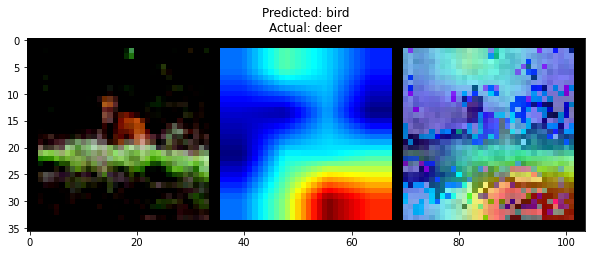

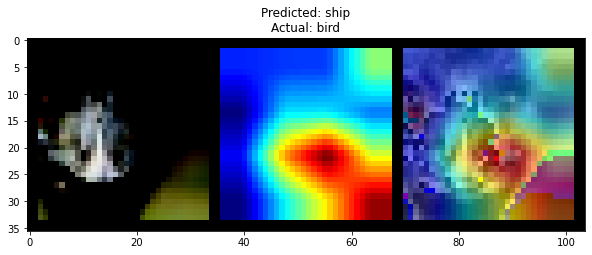

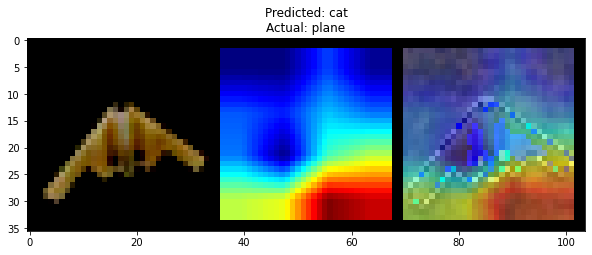

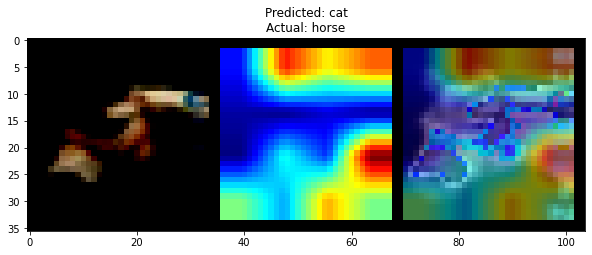

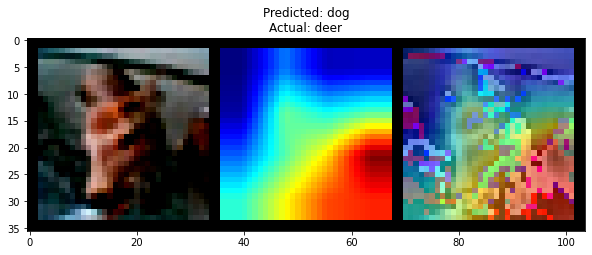

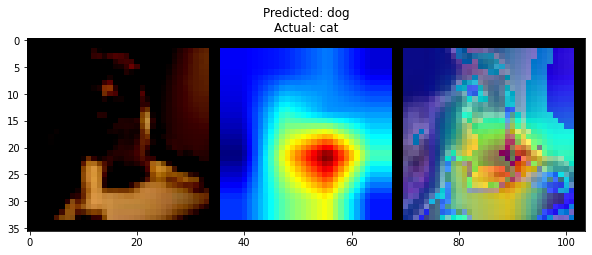

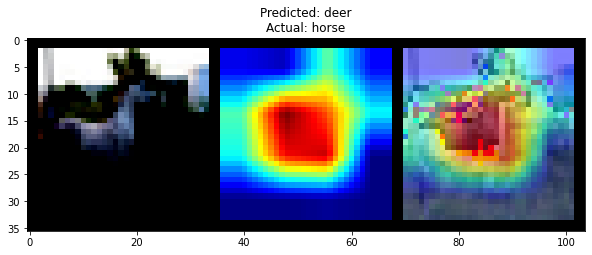

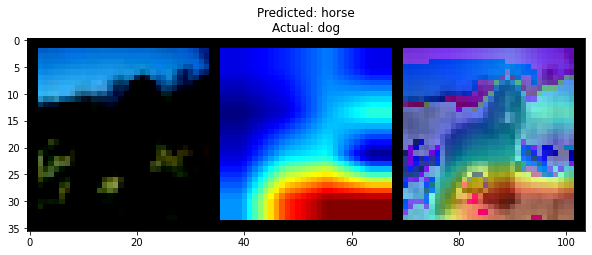

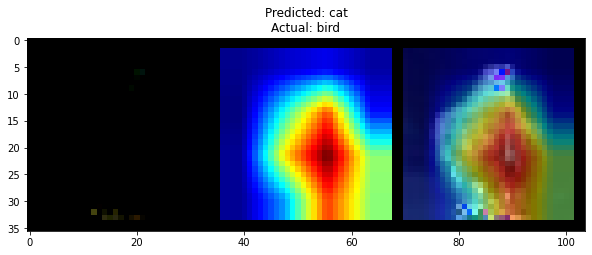

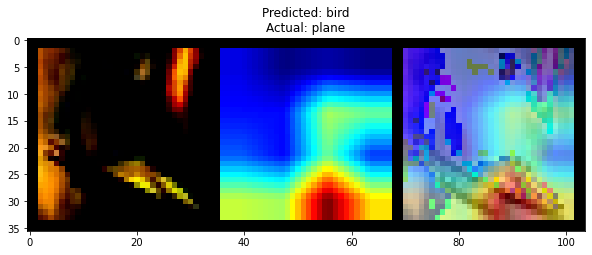

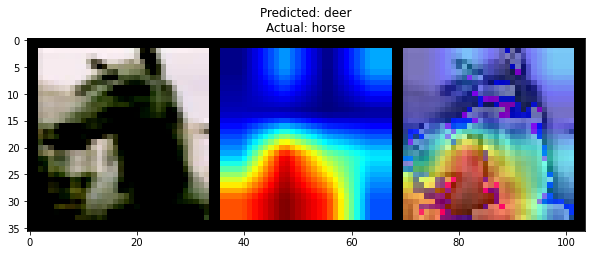

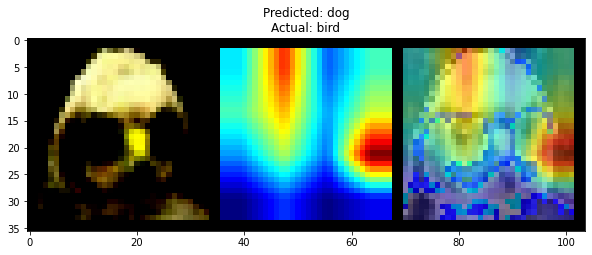

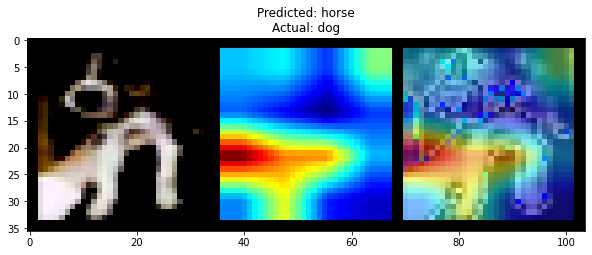

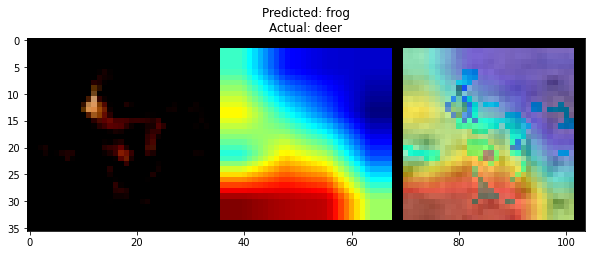

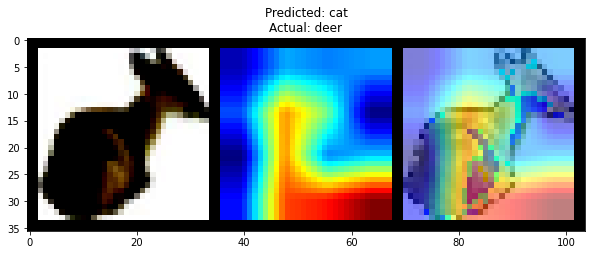

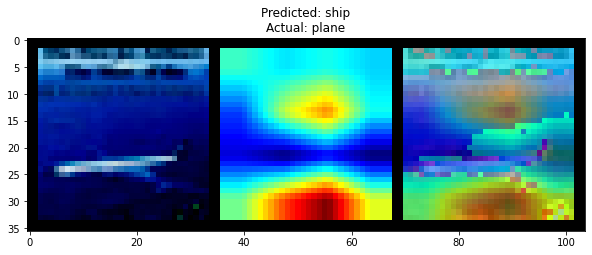

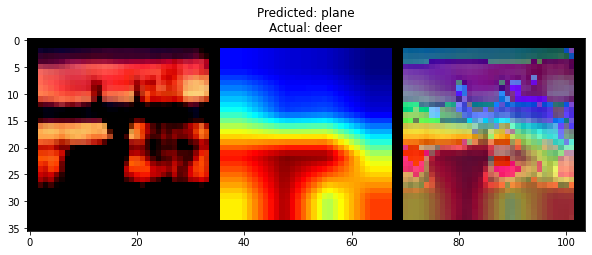

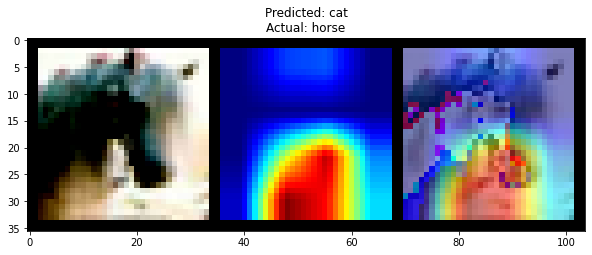

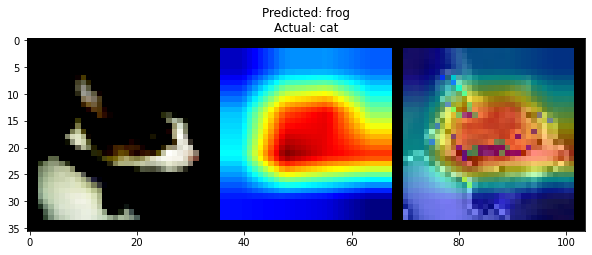

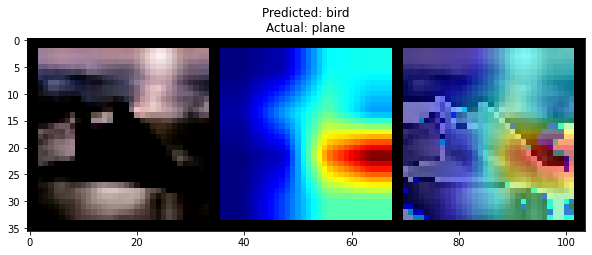

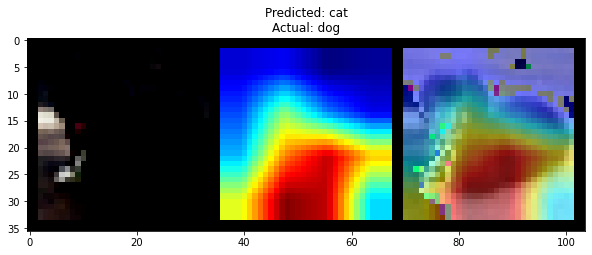

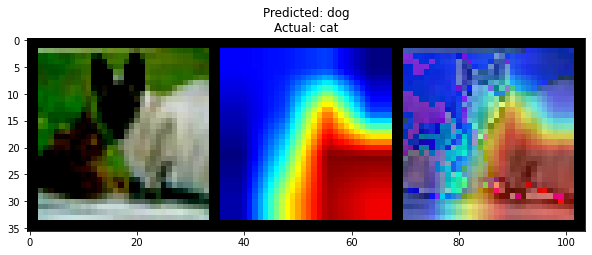

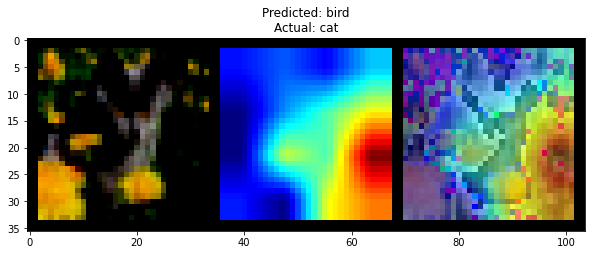

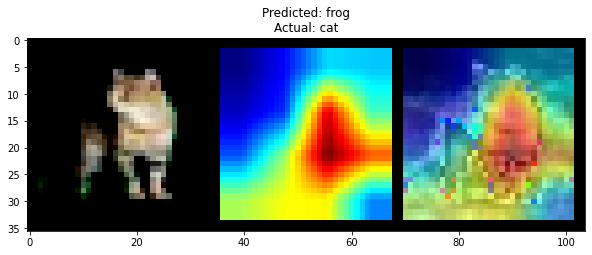

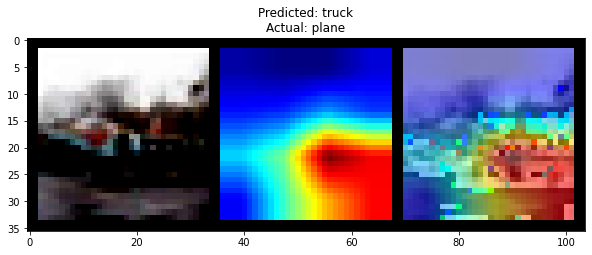

In [44]:
# Displaying the Misclassified images, heatmaps and their results

import Misclassified_image as MC
MC.gradcam_misclassified(new_model.misclassified_images,model,device)

In [45]:
new_model.total_accuracy()

Accuracy of the network on the 10000 test images: 88 %


In [46]:
new_model.classwise_acc()


Accuracy of plane : 86 %
Accuracy of   car : 96 %
Accuracy of  bird : 78 %
Accuracy of   cat : 70 %
Accuracy of  deer : 85 %
Accuracy of   dog : 87 %
Accuracy of  frog : 91 %
Accuracy of horse : 92 %
Accuracy of  ship : 96 %
Accuracy of truck : 94 %



Length of train acc is 50
Length of test acc is 50


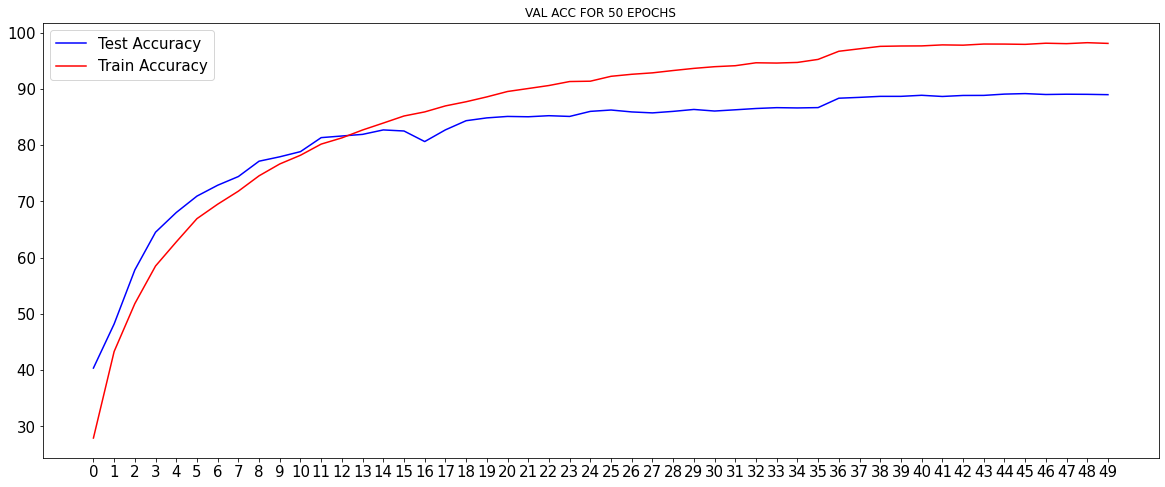

In [47]:
new_model.plot_train_test_acc()